# Climate Data Analysis for VEMAP Project Phase 2

# Assessing the Impact of Climate Change on Ecosystem Productivity.



## Introduction
The Vegetation/Ecosystem Modeling and Analysis Project (VEMAP) Phase 2 provides a comprehensive dataset of historical and projected climate data. This analysis aims to interpret these data to understand climate trends and predict future conditions. By leveraging machine learning, we seek insights into patterns and anomalies within the climate parameters over time, aiding in environmental decision-making and contributing to the broader dialogue on climate change and sustainability.

## Response Variable: Net Primary Productivity (Nppx)
Why Nppx?

Relevance to Climate Change: Nppx is directly influenced by climate factors (like temperature, precipitation) and is a key indicator of ecosystem health and productivity. It represents the rate at which plants in an ecosystem produce net useful chemical energy (i.e., after accounting for the energy used in respiration).
Indicator of Carbon Sequestration: It provides insights into carbon sequestration capabilities of ecosystems, which is crucial for understanding and mitigating the impacts of increased atmospheric CO2 levels.
Ecosystem Health: Changes in Nppx over time can indicate how ecosystems are responding to climate change, including factors like changing temperature regimes, precipitation patterns, and CO2 concentration.

## Supporting Variables:
Aetx (Actual Evapotranspiration): Offers insights into water balance and can be correlated with Nppx to understand how water availability impacts productivity.
Gppx (Gross Primary Productivity): Helps in understanding the gross input of carbon through photosynthesis. Comparing GPP and NPP can provide insights into ecosystem respiration rates.
Climatic Factors (e.g., Temperature, Precipitation from other data sources): Including these can help in understanding how climate change is directly impacting Nppx.
Vegc (Vegetation Carbon): Helps in understanding the carbon content in vegetation, which can be related to productivity.
## Analysis Approach:
Time Series Analysis of Nppx: To observe trends over time, potentially relating these to known climate change events or patterns.
Correlation Analysis: Understanding how Nppx correlates with other variables like Aetx, Gppx, and Vegc.
Regression Modeling: To predict Nppx based on various predictors, including climatic factors and other relevant variables from the dataset.
Change Analysis: Comparing Nppx over different time periods or across different elevational or vegetational areas to assess the impact of environmental changes.
## Potential Outcomes:
Identify Trends: Highlight how ecosystem productivity has changed over the years and project future trends.
Policy Implications: Provide data-driven insights for environmental and conservation policies.
Ecosystem Management: Aid in managing ecosystems by understanding productivity patterns and their drivers.

## Dataset Overview

In [42]:
# saome libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [43]:
#import data
df = pd.read_excel('Cleaned_Dataset.xlsx')

In [44]:
# check first few rows
df.head()

,date,elevation,varea,vveg,mask,aetx,gppx,nppx,roff,totc,tslc,vegc
0,1895,79.0,1584.0,10.0,2117,279.921143,526.669983,256.481995,177.597473,9137.581055,4768.462891,4369.118164
1,1896,79.0,1584.0,10.0,2117,325.900421,602.059998,314.925995,213.465027,9107.330078,4736.508789,4370.820801
2,1897,79.0,1584.0,10.0,2117,266.613495,508.476959,245.151001,153.621368,9133.831055,4761.395020,4372.436035
3,1898,79.0,1584.0,10.0,2117,268.471344,500.610992,237.226990,26.726561,9111.805664,4775.790039,4336.015137
4,1899,79.0,1584.0,10.0,2117,322.554382,597.226990,316.483002,206.786026,9088.238281,4749.683105,4338.555664


In [45]:
# dimension of data
df.shape

(437132, 12)

In [46]:
# data types
print(df.dtypes)

date           int64
elevation    float64
varea        float64
vveg         float64
mask           int64
aetx         float64
gppx         float64
nppx         float64
roff         float64
totc         float64
tslc         float64
vegc         float64
dtype: object


In [47]:
# Check for missing values in the dataset
print(df.isnull().sum())

date              0
elevation    203734
varea        203734
vveg         203528
mask              0
aetx         220420
gppx         220420
nppx         220420
roff         220420
totc         220420
tslc         220420
vegc         220420
dtype: int64


In [48]:
# Generate summary statistics for the numerical columns
print("\nSummary statistics for the dataset:")
display(df.describe().transpose())


Summary statistics for the dataset:


,count,mean,std,min,25%,50%,75%,max
date,437132.0,1997.500000,59.466445,1895.000000,1946.000000,1997.500000,2049.000000,2100.000000
elevation,233398.0,586.743160,646.185069,-28.000000,92.000000,290.000000,944.000000,2885.000000
varea,233398.0,2532.157988,182.377062,1257.000000,2507.000000,2553.000000,2612.000000,2782.000000
vveg,233604.0,17.912698,21.466404,1.000000,6.000000,13.000000,18.000000,92.000000
mask,437132.0,1310.042413,1338.395129,0.000000,0.000000,0.000000,2638.000000,3168.000000
aetx,216712.0,571.582559,281.835216,0.000000,314.521255,576.284698,799.447708,1729.419189
gppx,216712.0,1330.521524,809.886678,0.000000,619.897018,1258.292542,1912.439728,5850.952148
nppx,216712.0,652.456035,510.355038,-167.949997,243.367001,582.015472,897.975952,4286.376953
roff,216712.0,263.216905,260.075962,0.000000,66.204247,203.181526,389.344269,4994.694336
totc,216712.0,11273.130979,9200.539282,100.000000,2744.723389,8765.312500,18447.235840,48818.648438


There are a lot of missing data in variables apart from `date` and `mask`.

## Data Cleaning and Preprocessing
### Handling Missing Values

**Strategy for handling missing values:**
For columns with a significant number of missing values, we need to decide whether to fill these gaps or drop them.
The strategy depends on the percentage of missing data and the importance of the variable.

For columns with a low percentage of missing values, we might opt to fill in these gaps using a method like
mean or median imputation or a more sophisticated approach like K-Nearest Neighbors (KNN).

Handling missing values in 'elevation', 'varea', and 'vveg' columns
Since 'elevation', 'varea', and 'vveg' have a similar pattern of missingness, we can investigate if they are missing together.
If they are missing in the same rows, we may consider removing those rows altogether if the missing data is not substantial.

For columns with a high percentage of missing values, we may need to consider dropping the feature if it's not critical.
Otherwise, we might need to apply imputation techniques or even model the missing data if it's vital for the analysis.
Impute missing values for 'aetx', 'gppx', 'nppx', 'roff', 'totc', 'tslc', and 'vegc' using the median
This is a simplistic approach and you may consider more sophisticated methods like interpolation, especially since the data is time-series.

In [49]:
# Calculate the percentage of missing values for each column
missing_values = df.isnull().sum()
#print(missing_values)
missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of missing values for each column:")
print(missing_percentage)


Percentage of missing values for each column:
date          0.000000
elevation    46.606975
varea        46.606975
vveg         46.559849
mask          0.000000
aetx         50.424128
gppx         50.424128
nppx         50.424128
roff         50.424128
totc         50.424128
tslc         50.424128
vegc         50.424128
dtype: float64


In [50]:
# Check if the same rows are missing for 'elevation', 'varea', and 'vveg'
missing_rows = df[df['elevation'].isnull() & df['varea'].isnull() & df['vveg'].isnull()]
print(f"\nNumber of rows where 'elevation', 'varea', and 'vveg' are all missing: {len(missing_rows)}")


Number of rows where 'elevation', 'varea', and 'vveg' are all missing: 203528


In [51]:
for column in ['aetx', 'gppx', 'nppx', 'roff', 'totc', 'tslc', 'vegc']:
    df[column].fillna(df[column].median(), inplace=True)

In [52]:
df.dropna(subset=['elevation', 'varea', 'vveg'], inplace=True)

In [53]:
# confirm that there are no more missing values.
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
date         0
elevation    0
varea        0
vveg         0
mask         0
aetx         0
gppx         0
nppx         0
roff         0
totc         0
tslc         0
vegc         0
dtype: int64


### Data Type Conversion
Convert data into appropriate types; dates into datetime objects.


In [54]:
# Converting 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y') 


### Outlier Detection

In [55]:
# Define a function to detect outliers using the IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Return a boolean Series where True indicates the presence of an outlier
    outliers = ((df[column] < lower_bound) | (df[column] > upper_bound))
    return outliers

# Apply the outlier detection function to each relevant column
outlier_columns = ['elevation', 'varea', 'vveg', 'mask', 'aetx', 'gppx', 'nppx', 'roff', 'totc', 'tslc', 'vegc']
outliers_detected = {}

for column in outlier_columns:
    outliers = detect_outliers(df, column)
    outliers_detected[column] = outliers
    print(f"Outliers on '{column}'= {outliers.sum()} rows")

Outliers on 'elevation'= 4944 rows
Outliers on 'varea'= 11948 rows
Outliers on 'vveg'= 16686 rows
Outliers on 'mask'= 16686 rows
Outliers on 'aetx'= 65 rows
Outliers on 'gppx'= 1271 rows
Outliers on 'nppx'= 7205 rows
Outliers on 'roff'= 6383 rows
Outliers on 'totc'= 1099 rows
Outliers on 'tslc'= 3485 rows
Outliers on 'vegc'= 623 rows


In [56]:
outlier_thresholds = {
    'elevation': 0.02, 
    'varea': 0.02,
    'vveg': 0.02,
    'mask': 0.02,
    'aetx': 0.001,
    'gppx': 0.01,
    'nppx': 0.01,
    'roff': 0.01,
    'totc': 0.01,
    'tslc': 0.01,
    'vegc': 0.01
}

for column, threshold in outlier_thresholds.items():
    # Calculate the percentage of outliers
    outlier_percentage = outliers_detected[column].sum() / len(df)
    
    # If the percentage of outliers is less than the threshold, remove them
    if outlier_percentage < threshold:
        df = df[~outliers_detected[column]]
        print(f"Outliers removed from '{column}'")
    else:
        # cap outliers
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
        print(f"Outliers capped in '{column}'")


Outliers capped in 'elevation'
Outliers capped in 'varea'
Outliers capped in 'vveg'
Outliers capped in 'mask'
Outliers removed from 'aetx'


Outliers removed from 'gppx'
Outliers capped in 'nppx'
Outliers capped in 'roff'


C:\Users\fkang\AppData\Local\Temp/ipykernel_10368/344359623.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~outliers_detected[column]]


Outliers removed from 'totc'
Outliers capped in 'tslc'
Outliers removed from 'vegc'


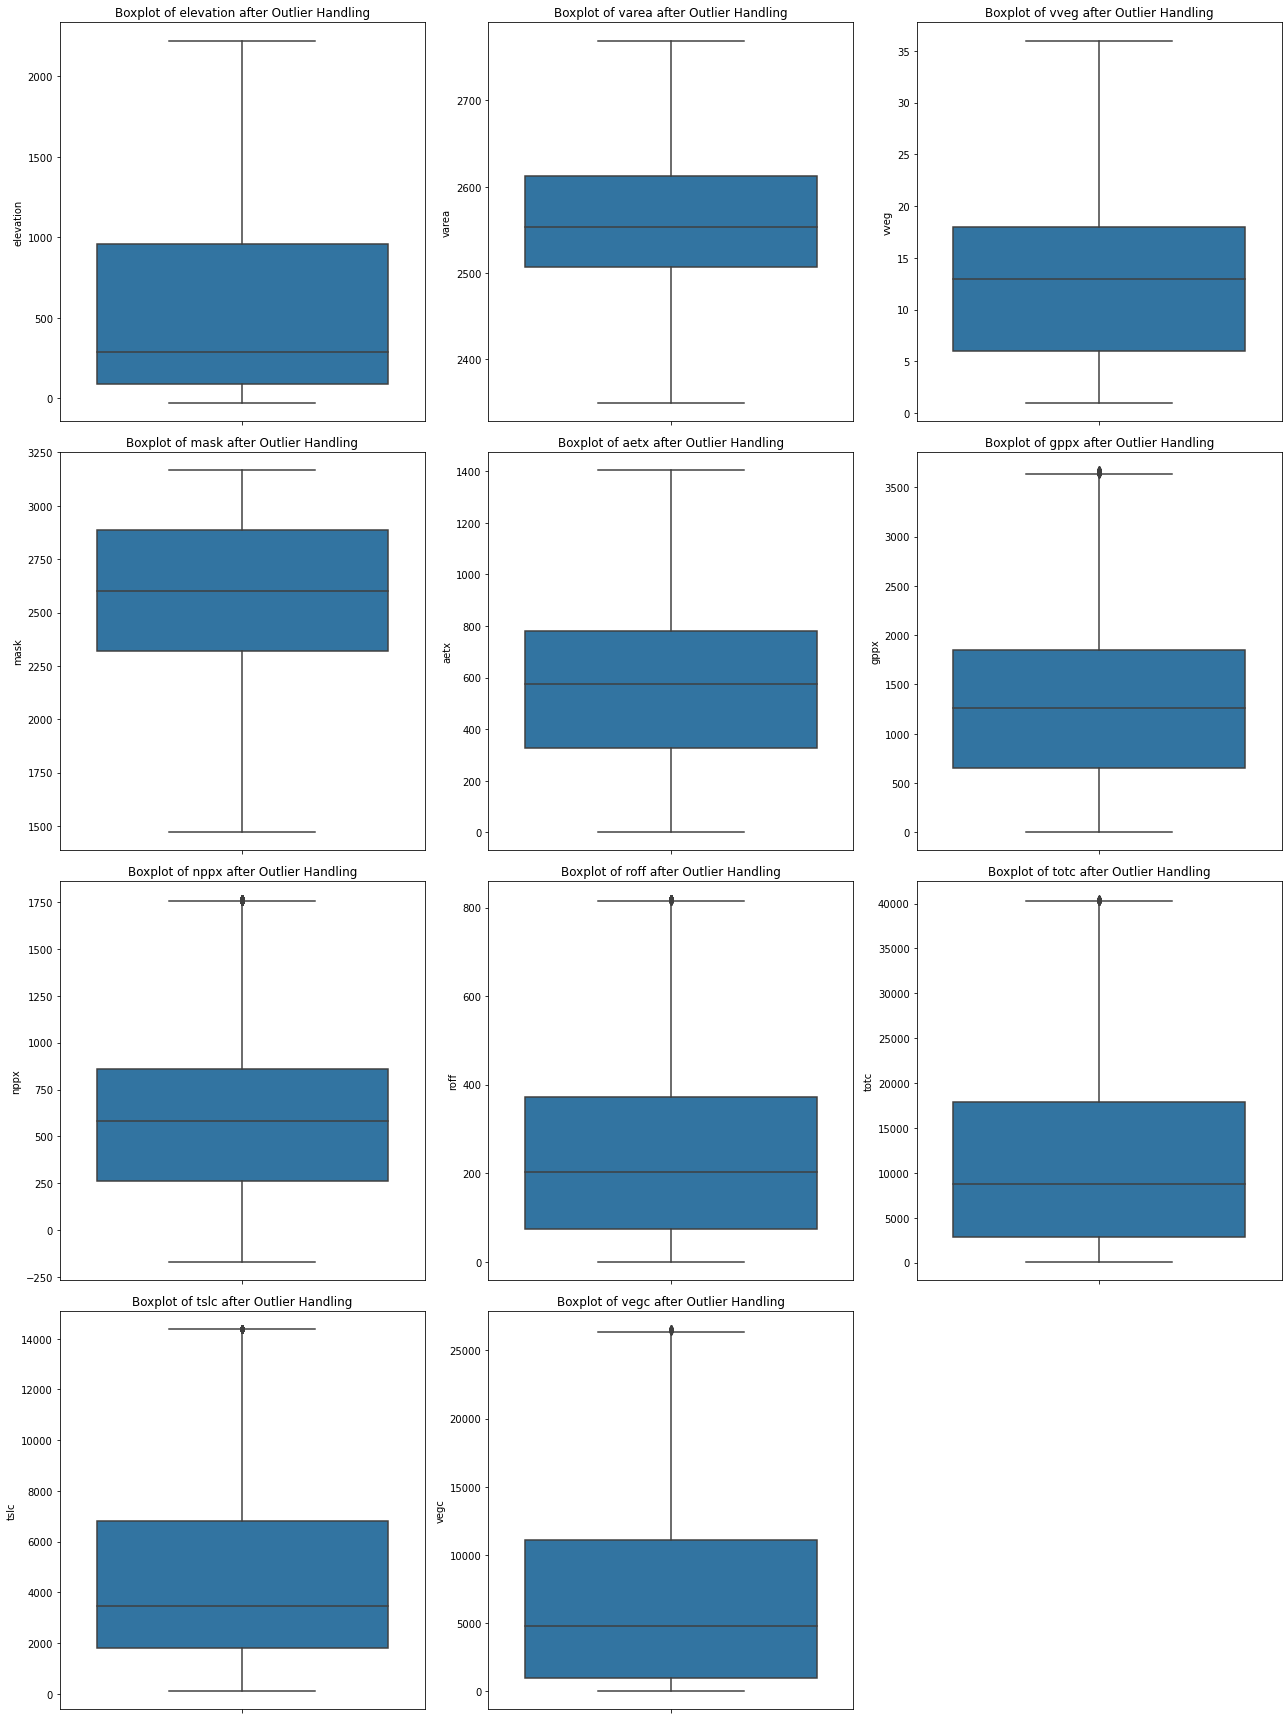

In [57]:
# Visualize the results post-outlier handling using a matrix of box plots
num_columns = len(outlier_columns)
num_rows = num_columns // 3 + (num_columns % 3 > 0)  # Arrange plots in a grid with 3 columns

# Set up the matplotlib figure
plt.figure(figsize=(18, num_rows * 6))  # Adjust figure size as needed

for i, column in enumerate(outlier_columns, 1):
    plt.subplot(num_rows, 3, i)  # Creates subplot in a grid
    sns.boxplot(y=df[column])
    plt.title(f"Boxplot of {column} after Outlier Handling")

plt.tight_layout()
plt.show()


## Exploratory Data Analysis (EDA)


### Correlation Analysis


In [58]:
# Calculating the correlation matrix
correlation_matrix = df.corr()

# Displaying the correlation matrix
print("Correlation Matrix:")
display(correlation_matrix)


Correlation Matrix:


,elevation,varea,vveg,mask,aetx,gppx,nppx,roff,totc,tslc,vegc
elevation,1.000000,-0.153593,0.076105,-0.069712,-0.699711,-0.590148,-0.336271,-0.280224,-0.536210,-0.415906,-0.548032
varea,-0.153593,1.000000,-0.062326,0.438774,0.137259,0.039916,-0.037898,0.009414,0.014357,-0.106515,0.083728
vveg,0.076105,-0.062326,1.000000,-0.567299,-0.396485,-0.347215,-0.152072,-0.443203,-0.555588,-0.506829,-0.546278
mask,-0.069712,0.438774,-0.567299,1.000000,0.163664,0.072399,-0.024902,0.067097,0.065996,-0.064433,0.152448
aetx,-0.699711,0.137259,-0.396485,0.163664,1.000000,0.897926,0.691747,0.396304,0.759994,0.713977,0.712329
gppx,-0.590148,0.039916,-0.347215,0.072399,0.897926,1.000000,0.824826,0.317473,0.750606,0.729969,0.688595
nppx,-0.336271,-0.037898,-0.152072,-0.024902,0.691747,0.824826,1.000000,0.158188,0.353060,0.443895,0.266144
roff,-0.280224,0.009414,-0.443203,0.067097,0.396304,0.317473,0.158188,1.000000,0.479302,0.390111,0.484416
totc,-0.536210,0.014357,-0.555588,0.065996,0.759994,0.750606,0.353060,0.479302,1.000000,0.889152,0.963725
tslc,-0.415906,-0.106515,-0.506829,-0.064433,0.713977,0.729969,0.443895,0.390111,0.889152,1.000000,0.736972


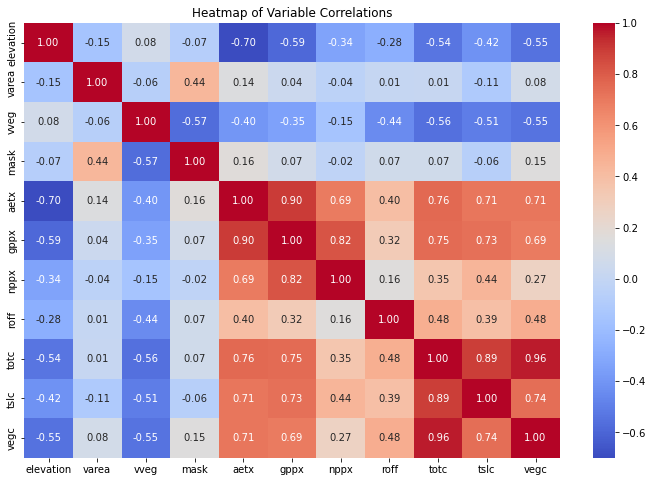

In [59]:
# Importing necessary library for heatmap
import seaborn as sns

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap of Variable Correlations')
plt.show()


In [60]:
# Identifying highly correlated pairs
threshold = 0.7
highly_correlated_pairs = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False)
highly_correlated_pairs = highly_correlated_pairs[highly_correlated_pairs.abs() > threshold]
highly_correlated_pairs = highly_correlated_pairs[highly_correlated_pairs.index.get_level_values(0) != highly_correlated_pairs.index.get_level_values(1)]
print("Highly Correlated Pairs:")
print(highly_correlated_pairs)


Highly Correlated Pairs:
vegc  totc    0.963725
totc  vegc    0.963725
aetx  gppx    0.897926
gppx  aetx    0.897926
tslc  totc    0.889152
totc  tslc    0.889152
gppx  nppx    0.824826
nppx  gppx    0.824826
aetx  totc    0.759994
totc  aetx    0.759994
gppx  totc    0.750606
totc  gppx    0.750606
tslc  vegc    0.736972
vegc  tslc    0.736972
tslc  gppx    0.729969
gppx  tslc    0.729969
tslc  aetx    0.713977
aetx  tslc    0.713977
vegc  aetx    0.712329
aetx  vegc    0.712329
dtype: float64



### Feature Transformation
Scaling and Normalizaiton

In [61]:
# Importing necessary libraries for feature transformation
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['aetx', 'gppx', 'nppx']])  # Replace with relevant features
df_scaled = pd.DataFrame(scaled_features, columns=['aetx_scaled', 'gppx_scaled', 'nppx_scaled'])

# Appending the scaled features to the original DataFrame
df = pd.concat([df, df_scaled], axis=1)

# Example: Normalizing a feature
normalizer = MinMaxScaler()
df['roff_normalized'] = normalizer.fit_transform(df[['roff']])


In [62]:
# Applying log transformationb
df['log_totc'] = np.log1p(df['totc'])  # Using log1p to handle zero values


In [ ]:
# Forward fill for time series data
df.ffill(inplace=True)
df.bfill(inplace=True)
# no missing values
print(df.isnull().sum())


## Machine Learning Models for Prediction
### Model Selection


Linear Regression: A good baseline model for regression problems. Simple yet effective at capturing linear relationships between the response and predictor variables.

Decision Tree Regressor: A non-linear model that is good at capturing complex relationships. It can, however, be prone to overfitting, especially with noisy data.

Random Forest Regressor: An ensemble method that averages the predictions of multiple decision trees, reducing the risk of overfitting while capturing complex relationships in the data.

Support Vector Machines (SVM) for Regression: Effective in high-dimensional spaces and in cases where the number of dimensions is greater than the number of samples. 

In [63]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# set date as index
df.set_index('date', inplace=True)

In [83]:

# Preparing the data
X = df.drop('nppx', axis=1)  
y = df['nppx'] 

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [84]:
# Initializing models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVM": SVR()
}

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    return rmse, r2

In [86]:
# Training and evaluating models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Use the imputed training data
    results[name] = evaluate_model(model, X_test, y_test)  # Use the imputed test data

# Displaying results
for name, (rmse, r2) in results.items():
    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.2f}")

In [ ]:
# Displaying results
for name, (rmse, r2) in results.items():
    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.2f}")

In [ ]:
# Visualizing model performance
labels = list(results.keys())
rmse_values = [result[0] for result in results.values()]
r2_values = [result[1] for result in results.values()]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rmse_values, width, label='RMSE')
rects2 = ax.bar(x + width/2, r2_values, width, label='R2')

ax.set_ylabel('Scores')
ax.set_title('Scores by model and metric')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()
